# In this notebook I will make time lagged correlation of EC-Earth data             PER RUN

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
proj = ccrs.PlateCarree()

from scipy import stats
from scipy.stats import t

# Upload all the Runs 

In [2]:
# Upload all the runs:
run_12= xr.open_dataset("/nobackup/users/ommeren/ECEarth/1-2_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_34= xr.open_dataset("/nobackup/users/ommeren/ECEarth/3-4_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_56= xr.open_dataset("/nobackup/users/ommeren/ECEarth/5-6_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_78= xr.open_dataset("/nobackup/users/ommeren/ECEarth/7-8_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_910= xr.open_dataset("/nobackup/users/ommeren/ECEarth/9-10_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1112= xr.open_dataset("/nobackup/users/ommeren/ECEarth/11-12_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1314= xr.open_dataset("/nobackup/users/ommeren/ECEarth/13-14_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1516= xr.open_dataset("/nobackup/users/ommeren/ECEarth/15-16_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")

# Isolate Runs for Analysis 

### **Run 1**

In [3]:
run_1 = run_12.sel(run="r1i1p5f1")
run_1

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r1i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

#### **Remove vertices to avoid errors later**

In [4]:
run_1_clean = run_1.drop_vars(["vertices_latitude", "vertices_longitude"], errors="ignore")
run_1_clean

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 165)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r1i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

### **Run 3**

In [5]:
run_3 = run_34.sel(run="r3i1p5f1")
run_3

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r3i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [6]:
run_3_clean = run_3.drop_vars(["vertices_latitude", "vertices_longitude"], errors="ignore")
run_3_clean

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 165)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r3i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

### **Run 4**

In [7]:
run_4 = run_34.sel(run="r4i1p5f1")
run_4

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r4i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

#### **Remove vertices to avoid errors later**

In [8]:
run_4_clean = run_4.drop_vars(["vertices_latitude", "vertices_longitude"], errors="ignore")
run_4_clean

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 165)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r4i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

### **Run 8**

In [9]:
run_8 = run_78.sel(run="r8i1p5f1")
run_8

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r8i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

#### **Remove vertices to avoid errors later**

In [10]:
run_8_clean = run_8.drop_vars(["vertices_latitude", "vertices_longitude"], errors="ignore")
run_8_clean

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 165)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r8i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

### **Run 12**

In [11]:
run_12 = run_1112.sel(run="r12i1p5f1")
run_12

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U9 'r12i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

#### **Remove vertices to avoid errors later**

In [12]:
run_12_clean = run_12.drop_vars(["vertices_latitude", "vertices_longitude"], errors="ignore")


# Prepare "Beginning Path"

### RUN 1

In [13]:
# get beginning of path

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_1_clean.lev - depth_level).argmin().item()

# Select region and depth
begin_path = run_1.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
begin_path_avg_0mr1 = begin_path.mean(dim=["lat", "lon"])

begin_path_avg_0mr1


<xarray.DataArray 'thetao' (time: 165)>
array([-0.46247718, -0.4833154 , -0.42302972, -0.69325095, -0.25993603,
       -0.1593053 , -0.2898231 , -0.30184317, -0.73236805, -0.26486567,
       -0.18385859, -0.03655709, -1.2907635 , -0.17426509, -0.3674476 ,
       -0.06801216, -0.4499195 , -0.43127114, -0.29004684, -0.48572195,
       -0.28294063, -0.10691614, -0.7916981 , -0.84122443, -0.41913614,
       -0.22376871,  0.11594987,  0.03890449,  0.41179985, -0.65219617,
        0.23267415, -0.22414295, -0.1549749 , -0.13641627,  0.25433457,
       -0.3214196 , -0.2487919 , -0.00437279,  0.17281272,  0.14548697,
        0.6216877 ,  0.20561709, -0.19960572, -0.32370755, -0.26944256,
        0.14489707, -0.07062199, -0.29232052, -0.04758498,  0.03281553,
        0.41481316,  1.0588722 , -0.23838413, -0.10054807,  0.5864799 ,
        0.04869228, -0.00773209, -0.01217565, -0.09047789,  0.23460914,
        0.19720931, -0.0115913 ,  0.299124  ,  0.5350959 ,  0.6249959 ,
        0.30685762,  0.7839121 ,  0.59172493,  0.36116308,  0.44696528,
        0.3675007 ,  0.10109606, -0.42286775, -0.23890069,  0.19681565,
       -0.0404322 , -0.12940238, -0.00589156, -0.3775828 , -0.0767851 ,
        0.07381622,  0.2922168 , -0.26034695,  0.23400435,  0.23855332,
       -0.3239403 , -0.31816283, -0.05089539, -0.28293517,  0.17080875,
       -0.23316456, -0.26076403, -0.15268353,  0.08179297, -0.05892035,
        0.1232197 , -0.14709018,  0.64952856,  0.05382634,  0.30218956,
       -0.32065815, -0.03109364, -0.25525835, -0.40224066, -0.45389634,
       -0.14090064, -0.46245918, -0.18501791,  0.2225293 , -0.17372994,
       -0.4024561 ,  0.11027075, -0.2397327 ,  0.08321953, -0.30441767,
        0.12968063,  0.45189643,  0.13456611, -0.0679538 ,  0.13475655,
        0.07172484, -0.03280276,  0.42315802, -0.41386956,  0.12315427,
        0.40613836, -0.03970162,  0.18351312, -0.00492512, -0.18180744,
       -0.46094605,  0.38103575,  0.26407477,  0.0839185 , -0.55828035,
        0.10418444,  0.04467012, -0.09966926,  0.22153051,  0.44529656,
        0.62847924, -0.12667644, -0.09743544, -0.21433339, -0.14302225,
        0.34603047,  0.23946868,  0.6086971 ,  0.36933306, -0.12153836,
        0.01246936,  0.8213117 ,  0.7411744 ,  0.4172712 , -0.08392069,
       -0.14536227,  0.5176842 ,  0.506112  ,  0.82748306,  0.1841352 ,
        0.19900554,  0.31878793,  0.44895   ,  0.45725757,  0.04928414],
      dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

### Run 3

In [14]:
# get beginning of path

# Boundaries
lat_range = slice(-25, -20)
lon_range = slice(230, 250)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_3_clean.lev - depth_level).argmin().item()

# Select region and depth
begin_path = run_3_clean.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
begin_path_avg_0mr3 = begin_path.mean(dim=["lat", "lon"])

begin_path_avg_0mr3

<xarray.DataArray 'thetao' (time: 165)>
array([-0.05924274, -0.4047267 , -0.72967666, -0.20641361,  0.17491402,
       -0.16938709, -0.38580218,  0.05673882, -0.04378933, -0.37266552,
       -0.22316594, -0.1730182 , -0.15349427, -0.32289147,  0.01992252,
        0.25146776, -0.69439256, -0.6620328 , -0.70847625, -0.6465489 ,
       -0.4941989 , -0.5887168 , -0.4321931 , -0.3543824 , -0.20634227,
       -0.1525075 ,  0.01346386, -0.3673729 , -0.57319903, -0.60342   ,
       -0.39950287, -0.44842362,  0.00833055, -0.14155869, -0.6337706 ,
       -0.376758  , -0.33586085, -0.21965885, -0.35953927,  0.21835865,
       -0.27330598, -0.23211662, -0.19470471, -0.06322438, -0.55339265,
       -0.13238253,  0.23216106,  0.10381241,  0.35022452,  0.00284943,
       -0.306304  ,  0.03914024, -0.23117214,  0.09956772, -0.17503542,
       -0.15411659, -0.17640105,  0.05569731, -0.16624779, -0.04588635,
       -0.20962009, -0.70337224, -0.56314147, -0.36505783, -0.52075857,
        0.21228445,  0.01774254, -0.33523285, -0.06928524, -0.08943476,
       -0.12633878,  0.21329197, -0.46003953, -0.00913599, -0.20061336,
       -0.11605337, -0.2996368 ,  0.08318558, -0.08306332,  0.2914721 ,
       -0.16456524, -0.35569328, -0.26727018, -0.06582447, -0.06260361,
       -0.27865693, -0.03654011, -0.03338308, -0.33531675,  0.2469754 ,
        0.17356429,  0.36171094,  0.35497034,  0.29704335,  0.00938677,
        0.28196228,  0.16957255,  0.22529459,  0.19351478, -0.19814785,
        0.14229307,  0.14380594, -0.27100673,  0.4306138 ,  0.00209667,
        0.11301363,  0.0700807 ,  0.3523531 ,  0.7464845 ,  0.13256593,
        0.34316063,  0.23236017,  0.43814424,  0.16417676, -0.14228648,
        0.4014428 ,  0.6590165 ,  0.38025787,  0.04196207,  0.07395391,
        0.0282099 , -0.36818373,  0.17980513,  0.03284323,  0.32216063,
        0.15694787,  0.3338713 ,  0.08993997,  0.16903137,  0.56267107,
        0.2442494 ,  0.29063562, -0.2096465 , -0.12598222,  0.3739085 ,
        0.3074388 , -0.06161198,  0.49411157,  0.3603085 , -0.12910505,
        0.41698396,  0.5190003 , -0.11366711,  0.32409188,  0.04545742,
        0.07688751, -0.02656836,  0.39330116,  0.74928284,  0.7557578 ,
        0.5292204 ,  0.5810003 ,  0.64494115,  0.51435506,  0.6112421 ,
        0.8602293 ,  0.609318  ,  0.48440576,  0.33138216, -0.5260358 ,
        0.09437889,  0.22862993,  0.02354399,  0.15372609,  0.7506314 ],
      dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r3i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

In [15]:
# get beginning of path

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_3_clean.lev - depth_level).argmin().item()

# Select region and depth
begin_path = run_3_clean.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
begin_path_avg_0mr3 = begin_path.mean(dim=["lat", "lon"])

begin_path_avg_0mr3

<xarray.DataArray 'thetao' (time: 165)>
array([ 3.48923922e-01, -5.29677629e-01, -3.73196334e-01, -3.80520552e-01,
       -2.91452825e-01, -3.95457409e-02, -3.39305401e-01, -2.44337376e-02,
        4.35626149e-01, -4.18116361e-01, -2.78924853e-01, -2.59892106e-01,
        1.59201831e-01, -1.53430715e-01,  5.81978634e-02, -6.76321760e-02,
       -6.90910161e-01, -7.08845973e-01,  5.60158196e-06, -3.48903388e-01,
       -4.42451715e-01, -4.68135834e-01, -3.12511295e-01, -6.07676029e-01,
       -7.46596336e-01, -3.35928082e-01, -4.66644377e-01, -1.69067025e-01,
       -6.55259609e-01, -6.87681437e-01, -5.80078661e-01, -5.32741487e-01,
       -2.10752830e-01, -2.82653421e-01, -1.60498232e-01, -2.59297192e-01,
        1.26482714e-02, -8.42659995e-02,  4.46552895e-02, -4.07070756e-01,
       -1.19903779e+00, -6.89070225e-01, -9.86505225e-02, -1.15456268e-01,
       -5.37902415e-01,  6.84684575e-01,  3.13525945e-01,  2.84122348e-01,
       -6.80682957e-02, -3.27387929e-01, -6.02082372e-01,  4.77719873e-01,
       -2.16177866e-01,  5.20729721e-01, -7.95852244e-02, -1.87659562e-01,
        2.42388882e-02,  1.88430965e-01,  1.51554868e-01,  1.25404298e-01,
        2.53028542e-01, -9.33084726e-01, -1.65830135e-01, -6.36697531e-01,
       -3.27969611e-01, -2.97126779e-03, -2.83572882e-01, -1.12114638e-01,
        4.91506964e-01, -3.99393827e-01, -1.28471658e-01, -1.01153985e-01,
        1.04411654e-01,  1.68707088e-01, -2.88381338e-01, -5.54190934e-01,
       -1.89193442e-01,  4.31168795e-01,  6.32144511e-01,  3.81933928e-01,
...
        2.45439455e-01,  1.56212702e-01, -3.71110290e-01,  3.67425859e-01,
        5.34488022e-01, -6.07010685e-02,  6.60590470e-01,  5.70861876e-01,
        4.60555442e-02, -2.87006199e-01, -1.59340382e-01, -4.28765297e-01,
        5.40371537e-01,  2.69489083e-02, -4.01704490e-01,  2.56695688e-01,
        3.51974607e-01, -1.14228383e-01,  4.97405417e-02,  2.21346244e-01,
        7.77231157e-01, -1.62233680e-01,  6.00149512e-01, -2.85286695e-01,
        1.86502591e-01, -1.37074525e-02, -3.76627862e-01,  8.45703423e-01,
        2.44016632e-01,  4.26157653e-01, -1.35126740e-01,  3.31055343e-01,
        4.33185548e-01, -2.12518707e-01,  4.10011202e-01,  9.56066698e-02,
        5.99381566e-01,  6.96423590e-01,  2.56467521e-01, -1.09743036e-01,
       -1.59135938e-01,  1.87901109e-01,  1.70778576e-02,  3.90037447e-01,
        7.02585340e-01,  2.42337987e-01, -4.23772112e-02,  6.21182285e-02,
        6.76023364e-02,  1.14657089e-01,  2.77652353e-01,  2.51529701e-02,
        4.11081731e-01,  7.53085196e-01, -3.84506077e-01, -1.74654827e-01,
       -1.31645069e-01,  1.10930033e-01,  5.45771122e-01,  2.26659045e-01,
        4.28462058e-01, -1.42219618e-01,  3.76931518e-01,  9.85616818e-02,
        5.40848553e-01,  6.49101675e-01,  1.21327192e-01,  8.83250356e-01,
        6.75111234e-01,  1.94103837e-01, -3.02022826e-02, -4.26497370e-01,
        3.85523975e-01,  3.17352325e-01,  2.35539645e-01,  1.25648826e-01,
        4.58669484e-01], dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r3i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

### RUN 4

In [16]:
# get beginning of path

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_12_clean.lev - depth_level).argmin().item()

# Select region and depth
begin_path = run_12.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
begin_path_avg_0mr4 = begin_path.mean(dim=["lat", "lon"])

begin_path_avg_0mr4

<xarray.DataArray 'thetao' (time: 165)>
array([ 0.00750991, -0.3640215 , -0.37423062, -0.32183424, -0.06554415,
        0.15054676, -0.29301882, -0.7540235 , -0.81573254,  0.17122366,
        0.0353399 , -0.11203013, -0.4199361 , -0.462443  , -0.36090586,
       -0.11358291, -0.45201865, -0.5804325 , -0.22646771, -0.2220866 ,
       -0.4138488 , -0.26586854,  0.19154169, -0.13583656,  0.2411285 ,
       -0.01700042, -0.27745458, -0.1002645 ,  0.14781027,  0.47812572,
       -0.28095248, -0.33931932,  0.11651593,  0.04225486,  0.09306699,
       -0.6321989 , -0.2800495 , -0.497167  , -1.0058817 , -0.2746599 ,
       -0.3722178 , -0.22864537,  0.19726054,  0.5971063 , -0.29489663,
       -0.45619246, -0.08585578,  0.02245885, -0.34881485,  0.39904204,
        0.30031216,  0.36965662, -0.27988732, -0.05305955,  0.34067687,
       -0.20774215, -0.27574593, -0.06047104, -0.07606093, -0.44991142,
        0.47764587, -0.00128553, -1.0960056 , -0.40624154, -0.02131994,
       -0.07760222, -0.6229452 , -0.00456461, -0.61942   , -0.21362142,
        0.4941004 , -0.12636721,  0.16226123,  0.14102994,  0.12143936,
        0.10641106, -0.04814726,  1.0135275 ,  0.06623837,  0.19934544,
        0.1743539 ,  0.43241826, -0.42422453,  0.01048365,  0.03884673,
       -0.19123168,  0.25048003, -0.24328305, -0.40548334, -0.05041345,
        0.14095435, -0.03339563,  0.02670828, -0.1211931 , -0.8569246 ,
       -0.47569367,  0.27749887,  0.32297623,  0.56633615,  0.2829745 ,
       -0.39863873,  0.05605555, -0.09023363,  0.22493257,  0.91132224,
        0.2446982 ,  0.10424151,  0.24917041, -0.26676145, -0.433335  ,
       -0.00382128,  0.57212347,  0.22878249,  0.0650236 , -0.08277208,
        0.14308023,  0.49954996,  0.2522883 ,  0.37595642,  0.5985226 ,
        0.0300664 ,  0.2288352 ,  0.11750279,  0.01701223,  0.00930774,
        0.13364069, -0.25374028, -0.13611631, -0.4998095 , -0.63215137,
        0.10437869,  0.26436028, -0.23585029,  0.0090844 ,  0.30847824,
        0.29157197,  0.54656106,  0.15034068,  0.90930295,  0.07291418,
        0.00721865,  0.70143735,  0.00507939, -0.07205863, -0.03351416,
       -0.6632385 , -0.13582425, -0.1496292 ,  0.04950515, -0.38494545,
       -0.24840125,  0.35656938, -0.01086277,  0.23371695,  0.39919278,
        0.5374122 , -0.40318912,  0.47125438,  0.51040167,  0.74167424,
        0.5896303 ,  0.39192766,  0.9808221 ,  1.1626718 ,  0.7573528 ],
      dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U9 'r12i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

## RUN 8

In [47]:
# get beginning of path

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_8_clean.lev - depth_level).argmin().item()

# Select region and depth
begin_path = run_8.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
begin_path_avg_0mr8 = begin_path.mean(dim=["lat", "lon"])

begin_path_avg_0mr8

<xarray.DataArray 'thetao' (time: 165)>
array([ 2.86167953e-02, -4.35633399e-02,  1.81129854e-03, -3.44323903e-01,
        7.32954293e-02, -7.13507608e-02, -2.85777241e-01, -2.33106256e-01,
       -4.98533309e-01, -2.55798519e-01, -3.90567511e-01, -3.63770247e-01,
       -7.06429109e-02, -3.37792039e-02,  4.31185067e-02, -7.67209828e-01,
       -7.09566772e-01, -2.16671184e-01, -5.30845225e-02, -8.40471148e-01,
        3.45789790e-01,  3.48956063e-02, -1.85938179e-01,  2.47298796e-02,
       -3.65996271e-01, -3.93339694e-01, -4.60591763e-01, -1.00450151e-01,
        2.02863857e-01,  6.83903754e-01, -1.30402640e-01, -3.27427804e-01,
        2.22378880e-01, -1.39563829e-01, -2.76209027e-01, -5.30807257e-01,
       -4.42691028e-01, -2.76182383e-01, -6.67823017e-01,  6.09951615e-02,
        2.57512033e-01, -3.27957064e-01, -5.89256763e-01, -7.14550912e-01,
       -1.12845488e-01, -4.21246111e-01,  4.17171866e-02,  7.88688287e-02,
       -4.66384292e-02, -2.54144073e-01, -2.34943569e-01,  1.27194569e-01,
        7.44457021e-02,  4.21288431e-01, -2.87243456e-01, -2.25576386e-01,
       -4.98868108e-01, -6.51538819e-02, -2.46872857e-01, -3.11218858e-01,
       -6.08006060e-01, -1.49892077e-01,  3.00592214e-01,  6.61738455e-01,
        1.89868540e-01, -8.18515942e-02, -4.32249457e-01,  2.06134195e-04,
        1.88166514e-01, -1.44322850e-02, -4.14070368e-01, -2.23063737e-01,
        4.62960333e-01, -2.46465698e-01, -6.14007473e-01, -2.83440918e-01,
       -7.80276716e-01, -4.99384075e-01, -2.47918442e-01,  3.01121652e-01,
...
       -7.87006795e-01, -1.66650578e-01, -2.34543145e-01,  3.25345695e-02,
       -2.35391911e-02, -2.26558849e-01,  4.26547885e-01,  3.10023546e-01,
       -8.56530014e-03,  6.88570961e-02,  2.71493010e-02, -8.72495770e-02,
        5.78289688e-01,  6.82618260e-01,  2.13481560e-01,  1.23000801e-01,
       -2.21348405e-01,  3.40587646e-01,  1.02689505e-01,  1.01007886e-01,
        1.77577004e-01,  7.49064386e-01, -6.64468259e-02,  1.41984135e-01,
       -7.65631814e-03,  6.45411611e-02,  1.66665956e-01, -5.16955793e-01,
       -3.71789038e-02,  1.00030273e-01,  2.95720041e-01,  1.25175774e-01,
        2.22946092e-01, -6.09244891e-02, -5.78770518e-01,  1.10879757e-01,
        3.02216500e-01,  1.85539290e-01,  3.46257031e-01,  7.34214764e-03,
        5.09198010e-01,  1.07431553e-01, -8.97961482e-02, -7.76722562e-03,
        3.23996663e-01,  8.24713036e-02, -5.61065137e-01, -6.52631521e-01,
        3.79206799e-02,  6.13111019e-01,  5.50143898e-01, -3.93525630e-01,
        9.46824923e-02,  1.89419314e-01, -5.76747060e-01,  5.26424348e-01,
       -2.45141070e-02,  3.28024715e-01,  4.59323615e-01,  8.86506557e-01,
        4.11365628e-01,  2.24256575e-01,  3.32377791e-01,  1.02245294e-01,
        2.11921468e-01,  9.02385890e-01,  9.43169296e-01,  2.71690160e-01,
        7.42561340e-01,  8.36681783e-01,  2.84066916e-01,  8.23458552e-01,
        8.39105070e-01,  4.41248566e-01,  1.02709964e-01, -3.37591946e-01,
        7.51575688e-04], dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r8i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

## RUN 12

In [18]:
def get_begin_path(run_data, lat_range = slice(-28, -23), lon_range = slice(263, 282)):
    depth_level = 0

    # Get depth closest to 0 m 
    depth_idx = abs(run_data.lev - depth_level).argmin().item()

    # Select region and depth
    begin_path = run_data.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

    # Average over latitude and longitude
    begin_path_avg_0m = begin_path.mean(dim=["lat", "lon"])

    return begin_path_avg_0m

In [19]:
# get beginning of pat

begin_path_avg_0mr12 = get_begin_path(run_12_clean)
begin_path_avg_0mr12

<xarray.DataArray 'thetao' (time: 165)>
array([ 0.00750991, -0.3640215 , -0.37423062, -0.32183424, -0.06554415,
        0.15054676, -0.29301882, -0.7540235 , -0.81573254,  0.17122366,
        0.0353399 , -0.11203013, -0.4199361 , -0.462443  , -0.36090586,
       -0.11358291, -0.45201865, -0.5804325 , -0.22646771, -0.2220866 ,
       -0.4138488 , -0.26586854,  0.19154169, -0.13583656,  0.2411285 ,
       -0.01700042, -0.27745458, -0.1002645 ,  0.14781027,  0.47812572,
       -0.28095248, -0.33931932,  0.11651593,  0.04225486,  0.09306699,
       -0.6321989 , -0.2800495 , -0.497167  , -1.0058817 , -0.2746599 ,
       -0.3722178 , -0.22864537,  0.19726054,  0.5971063 , -0.29489663,
       -0.45619246, -0.08585578,  0.02245885, -0.34881485,  0.39904204,
        0.30031216,  0.36965662, -0.27988732, -0.05305955,  0.34067687,
       -0.20774215, -0.27574593, -0.06047104, -0.07606093, -0.44991142,
        0.47764587, -0.00128553, -1.0960056 , -0.40624154, -0.02131994,
       -0.07760222, -0.6229452 , -0.00456461, -0.61942   , -0.21362142,
        0.4941004 , -0.12636721,  0.16226123,  0.14102994,  0.12143936,
        0.10641106, -0.04814726,  1.0135275 ,  0.06623837,  0.19934544,
        0.1743539 ,  0.43241826, -0.42422453,  0.01048365,  0.03884673,
       -0.19123168,  0.25048003, -0.24328305, -0.40548334, -0.05041345,
        0.14095435, -0.03339563,  0.02670828, -0.1211931 , -0.8569246 ,
       -0.47569367,  0.27749887,  0.32297623,  0.56633615,  0.2829745 ,
       -0.39863873,  0.05605555, -0.09023363,  0.22493257,  0.91132224,
        0.2446982 ,  0.10424151,  0.24917041, -0.26676145, -0.433335  ,
       -0.00382128,  0.57212347,  0.22878249,  0.0650236 , -0.08277208,
        0.14308023,  0.49954996,  0.2522883 ,  0.37595642,  0.5985226 ,
        0.0300664 ,  0.2288352 ,  0.11750279,  0.01701223,  0.00930774,
        0.13364069, -0.25374028, -0.13611631, -0.4998095 , -0.63215137,
        0.10437869,  0.26436028, -0.23585029,  0.0090844 ,  0.30847824,
        0.29157197,  0.54656106,  0.15034068,  0.90930295,  0.07291418,
        0.00721865,  0.70143735,  0.00507939, -0.07205863, -0.03351416,
       -0.6632385 , -0.13582425, -0.1496292 ,  0.04950515, -0.38494545,
       -0.24840125,  0.35656938, -0.01086277,  0.23371695,  0.39919278,
        0.5374122 , -0.40318912,  0.47125438,  0.51040167,  0.74167424,
        0.5896303 ,  0.39192766,  0.9808221 ,  1.1626718 ,  0.7573528 ],
      dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U9 'r12i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

# --------------------------------------------------------------------------

# Time Series Excursion  

### Full time series

Text(0.5, 1.0, 'Average Temp Anomalie of Begin Path (run1)')

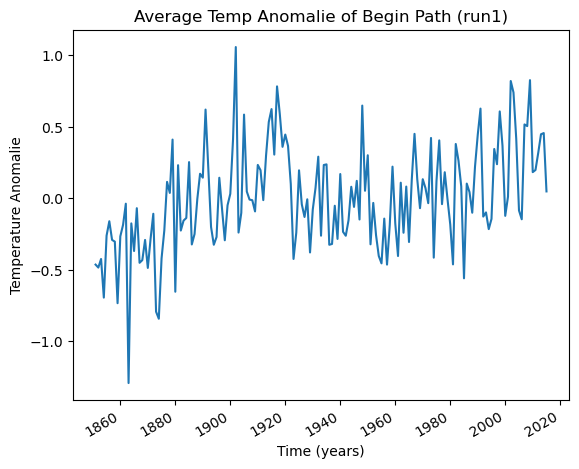

In [20]:
begin_path_avg_0mr1.plot()
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomalie')
plt.title('Average Temp Anomalie of Begin Path (run1)')

### Time series from 1958-2014

In [21]:
# To compare to ORAS data Select the time range 1958-2014
subset = begin_path_avg_0mr1.sel(time=slice("1900-01-01", "2014-12-31"))

# Print to check
print(subset)

<xarray.DataArray 'thetao' (time: 115)>
array([ 0.41481316,  1.0588722 , -0.23838413, -0.10054807,  0.5864799 ,
        0.04869228, -0.00773209, -0.01217565, -0.09047789,  0.23460914,
        0.19720931, -0.0115913 ,  0.299124  ,  0.5350959 ,  0.6249959 ,
        0.30685762,  0.7839121 ,  0.59172493,  0.36116308,  0.44696528,
        0.3675007 ,  0.10109606, -0.42286775, -0.23890069,  0.19681565,
       -0.0404322 , -0.12940238, -0.00589156, -0.3775828 , -0.0767851 ,
        0.07381622,  0.2922168 , -0.26034695,  0.23400435,  0.23855332,
       -0.3239403 , -0.31816283, -0.05089539, -0.28293517,  0.17080875,
       -0.23316456, -0.26076403, -0.15268353,  0.08179297, -0.05892035,
        0.1232197 , -0.14709018,  0.64952856,  0.05382634,  0.30218956,
       -0.32065815, -0.03109364, -0.25525835, -0.40224066, -0.45389634,
       -0.14090064, -0.46245918, -0.18501791,  0.2225293 , -0.17372994,
       -0.4024561 ,  0.11027075, -0.2397327 ,  0.08321953, -0.30441767,
        0.12968063,  0.4

Text(0.5, 1.0, 'Average Temp Anomalie of Begin Path (run1)')

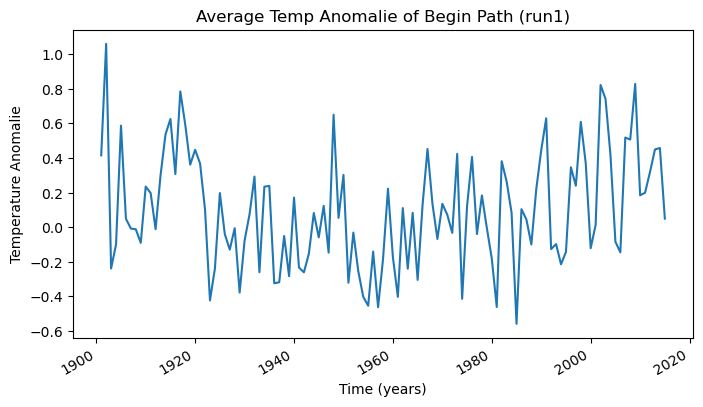

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))
subset.plot()
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomalie')
plt.title('Average Temp Anomalie of Begin Path (run1)')

### Create an ouput file for peak comparison 

In [23]:
output_file = "EC-Earth_avg_beginning_path_0m_1958-2014.nc"
subset.to_netcdf("/nobackup/users/ommeren/EC-Earth_avg_beginning_path_0m_1958-2014.nc")

# Two time series over each other HELP ANDREAS:

In [24]:
begin_path_avg_0mr1

<xarray.DataArray 'thetao' (time: 165)>
array([-0.46247718, -0.4833154 , -0.42302972, -0.69325095, -0.25993603,
       -0.1593053 , -0.2898231 , -0.30184317, -0.73236805, -0.26486567,
       -0.18385859, -0.03655709, -1.2907635 , -0.17426509, -0.3674476 ,
       -0.06801216, -0.4499195 , -0.43127114, -0.29004684, -0.48572195,
       -0.28294063, -0.10691614, -0.7916981 , -0.84122443, -0.41913614,
       -0.22376871,  0.11594987,  0.03890449,  0.41179985, -0.65219617,
        0.23267415, -0.22414295, -0.1549749 , -0.13641627,  0.25433457,
       -0.3214196 , -0.2487919 , -0.00437279,  0.17281272,  0.14548697,
        0.6216877 ,  0.20561709, -0.19960572, -0.32370755, -0.26944256,
        0.14489707, -0.07062199, -0.29232052, -0.04758498,  0.03281553,
        0.41481316,  1.0588722 , -0.23838413, -0.10054807,  0.5864799 ,
        0.04869228, -0.00773209, -0.01217565, -0.09047789,  0.23460914,
        0.19720931, -0.0115913 ,  0.299124  ,  0.5350959 ,  0.6249959 ,
        0.30685762,  0.7839121 ,  0.59172493,  0.36116308,  0.44696528,
        0.3675007 ,  0.10109606, -0.42286775, -0.23890069,  0.19681565,
       -0.0404322 , -0.12940238, -0.00589156, -0.3775828 , -0.0767851 ,
        0.07381622,  0.2922168 , -0.26034695,  0.23400435,  0.23855332,
       -0.3239403 , -0.31816283, -0.05089539, -0.28293517,  0.17080875,
       -0.23316456, -0.26076403, -0.15268353,  0.08179297, -0.05892035,
        0.1232197 , -0.14709018,  0.64952856,  0.05382634,  0.30218956,
       -0.32065815, -0.03109364, -0.25525835, -0.40224066, -0.45389634,
       -0.14090064, -0.46245918, -0.18501791,  0.2225293 , -0.17372994,
       -0.4024561 ,  0.11027075, -0.2397327 ,  0.08321953, -0.30441767,
        0.12968063,  0.45189643,  0.13456611, -0.0679538 ,  0.13475655,
        0.07172484, -0.03280276,  0.42315802, -0.41386956,  0.12315427,
        0.40613836, -0.03970162,  0.18351312, -0.00492512, -0.18180744,
       -0.46094605,  0.38103575,  0.26407477,  0.0839185 , -0.55828035,
        0.10418444,  0.04467012, -0.09966926,  0.22153051,  0.44529656,
        0.62847924, -0.12667644, -0.09743544, -0.21433339, -0.14302225,
        0.34603047,  0.23946868,  0.6086971 ,  0.36933306, -0.12153836,
        0.01246936,  0.8213117 ,  0.7411744 ,  0.4172712 , -0.08392069,
       -0.14536227,  0.5176842 ,  0.506112  ,  0.82748306,  0.1841352 ,
        0.19900554,  0.31878793,  0.44895   ,  0.45725757,  0.04928414],
      dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

### Different Area:

In [25]:
# Boundaries
lat_range = slice(-20, -15)
lon_range = slice(160, 170)  
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_1.lev - depth_level).argmin().item()

# Select region and depth
other = run_1.thetao.sel(lat=lat_range, lon=lon_range).isel(lev=depth_idx)

# Average over latitude and longitude
other_avg_0m = other.mean(dim=["lat", "lon"])

other_avg_0m

<xarray.DataArray 'thetao' (time: 165)>
array([-3.62484008e-01, -2.36004647e-02,  2.88526356e-01,  2.67524838e-01,
       -2.68401057e-01, -3.78408879e-01, -1.63161010e-01, -5.18203914e-01,
        1.96021885e-01, -3.22928242e-02, -2.40596309e-01, -1.68092534e-01,
       -1.91951483e-01, -3.34015459e-01, -4.17271227e-01, -2.28860393e-01,
       -1.18165284e-01, -4.85803246e-01, -3.79187226e-01, -1.27225220e-01,
       -3.21618646e-01, -5.96622862e-02, -8.05390179e-02, -1.81166947e-01,
       -6.41040429e-02, -1.91106260e-01, -8.20327029e-02, -2.31764600e-01,
       -5.26791394e-01, -2.42775768e-01,  5.08176796e-02, -3.07635993e-01,
        6.70854598e-02, -1.94784433e-01, -2.37066880e-01, -2.50699729e-01,
       -2.36118734e-01, -8.03187728e-01, -4.38494682e-01,  3.18287998e-01,
       -1.14967920e-01,  6.75786957e-02,  4.18425858e-01,  1.49059951e-01,
       -3.70392263e-01, -2.54742503e-01, -5.33936977e-01,  4.24570478e-02,
       -3.02302629e-01,  1.20173149e-01, -1.48186639e-01,  4.96208202e-03,
       -4.57214750e-02,  3.19334835e-01, -4.43425737e-02, -2.20058821e-02,
        1.97419018e-01, -9.59980786e-02, -1.31081387e-01, -5.86788170e-02,
       -3.06679010e-01,  3.48355532e-01,  1.14998892e-01, -3.30488801e-01,
       -3.18317145e-01,  1.55220643e-01, -2.20271111e-01,  1.95092350e-01,
       -7.00930431e-02, -2.87951767e-01, -4.89985079e-01,  3.20947409e-01,
        6.56466424e-01, -3.31550613e-02, -2.53637910e-01,  1.36105314e-01,
       -1.10047229e-01, -6.55551016e-01,  2.95560844e-02, -2.75657922e-01,
...
       -1.60036698e-01,  3.39010090e-01,  6.54978976e-02, -3.16600055e-02,
        4.71004881e-02,  2.63172179e-01,  4.38845873e-01, -2.63970882e-01,
       -4.00982827e-01, -2.06315801e-01,  1.67617793e-04, -1.77354246e-01,
       -2.16802973e-02,  2.57763714e-01, -1.04652822e-01,  2.30222970e-01,
       -2.33777955e-01,  5.42280562e-02,  1.11784324e-01,  2.52639592e-01,
       -2.86791604e-02,  7.02332705e-02, -1.69173241e-01, -2.43313178e-01,
        3.01818341e-01,  7.83511326e-02, -2.53474742e-01, -3.06021959e-01,
       -5.57477713e-01, -4.90443408e-02, -1.76106155e-01,  3.33428144e-01,
        6.70005009e-02, -3.51027101e-01, -1.69345394e-01,  3.51900518e-01,
       -1.76137239e-01, -1.89861760e-01,  9.91410837e-02,  2.57771313e-01,
       -1.37872919e-01,  1.17002182e-01,  4.80186082e-02, -3.98133039e-01,
        4.33856845e-01,  1.69234887e-01,  3.57128710e-01,  8.64677422e-04,
       -1.31384045e-01,  4.71944392e-01,  2.16205791e-01,  8.14784970e-03,
       -5.73195815e-01,  5.26116610e-01,  4.29235071e-01, -1.65732577e-01,
       -3.01696390e-01,  4.63232808e-02,  4.83156219e-02,  4.61462528e-01,
        3.92810702e-01,  2.71051705e-01,  6.14869535e-01,  4.84698057e-01,
        3.05410653e-01,  5.41966259e-01,  8.89441848e-01,  6.29626453e-01,
        6.49637520e-01,  2.44252205e-01,  3.23279619e-01,  6.79621935e-01,
        7.47681141e-01,  6.66789234e-01,  5.40303171e-01, -2.58007824e-01,
        1.14231277e+00], dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

### Plot begin path and other area over each other:

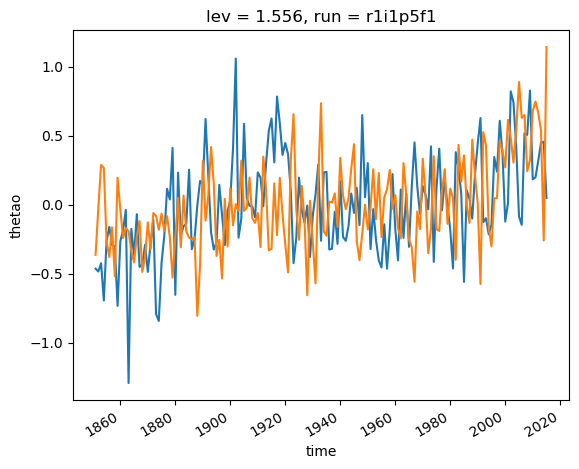

In [26]:
begin_path_avg_0mr1.plot()
other_avg_0m.plot()

### Plot the correlation of begin path with surface (NO LAG):

## RUN 1

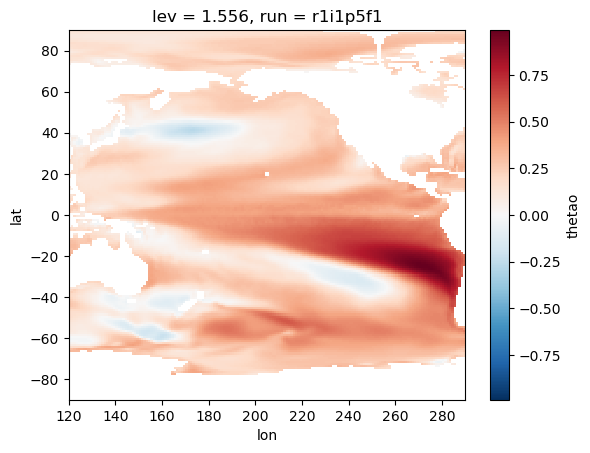

In [27]:
xr.corr(begin_path_avg_0mr1, run_1_clean.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

#### Let's take a look at what the time series at the beginning of path looks like:

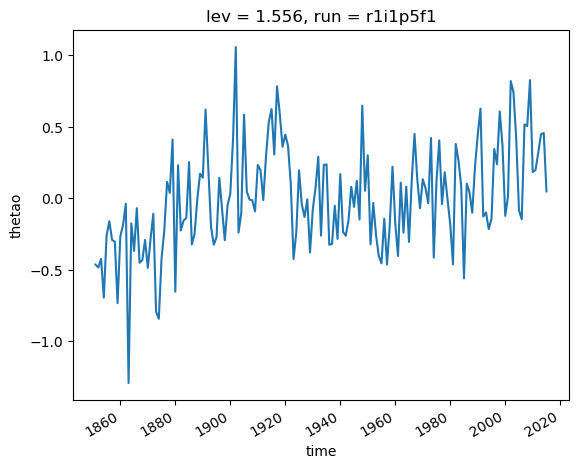

In [28]:
begin_path_avg_0mr1.plot()

#### You can see that there is a whirly pattern going on (up,down,up) 

In [29]:
run_1_clean.thetao.sel(lev = 0, method = "nearest")

<xarray.DataArray 'thetao' (time: 165, lat: 180, lon: 170)>
[5049000 values with dtype=float32]
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

## RUN 4

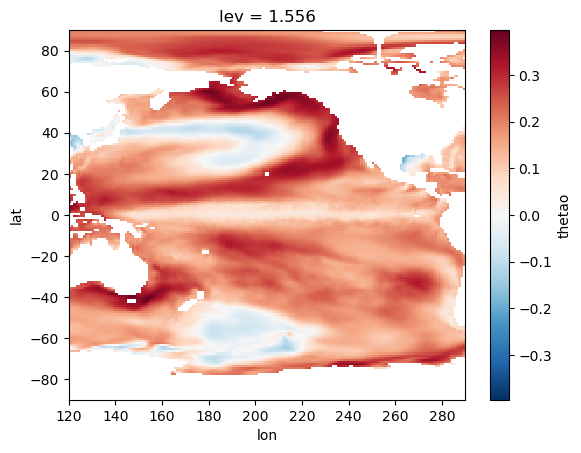

In [30]:
xr.corr(begin_path_avg_0mr4, run_4_clean.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

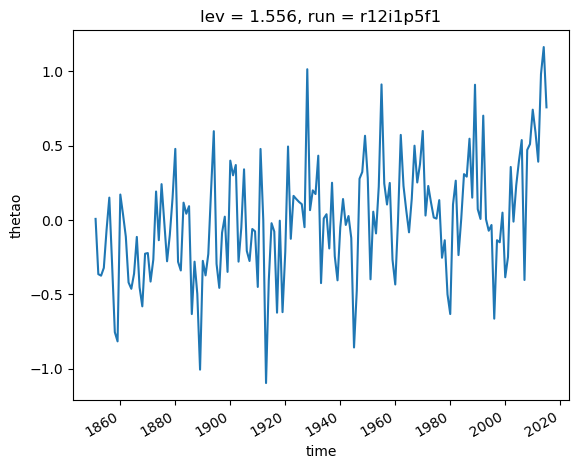

In [31]:
begin_path_avg_0mr4.plot()

## RUN 8

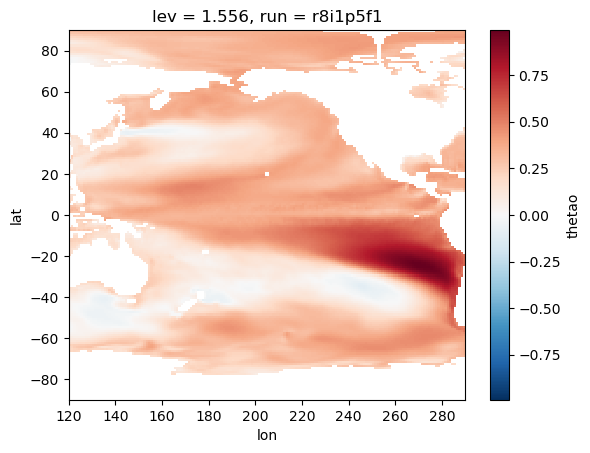

In [32]:
xr.corr(begin_path_avg_0mr8, run_8_clean.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

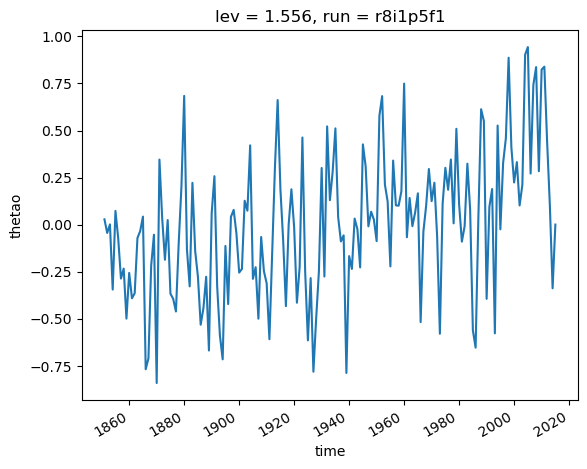

In [33]:
begin_path_avg_0mr8.plot()

## Run 12

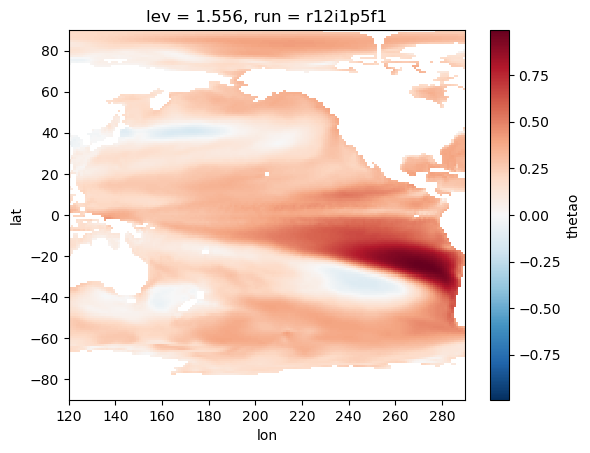

In [34]:
xr.corr(begin_path_avg_0mr12, run_12_clean.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

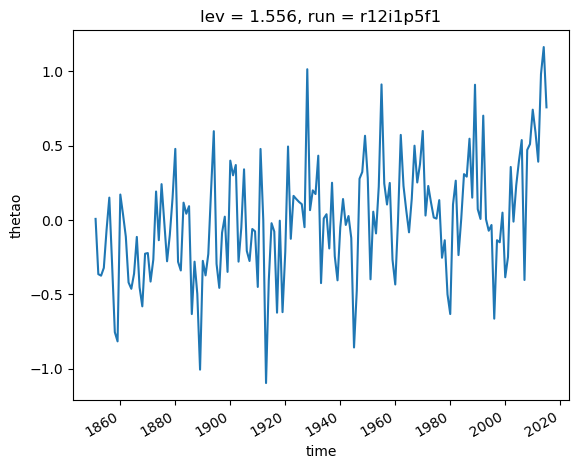

In [35]:
begin_path_avg_0mr12.plot()

# Smaller Time Range

## RUN 1

### Let's see if PDO is dominant --> Causing the positive corr in the section at the surface!

In [36]:
#get the beginning of the path from 1940-2010

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
time_range = slice("1940","2010")
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_1.lev - depth_level).argmin().item()

# Select region and depth
small_begin_path_0m = run_1.thetao.sel(lat=lat_range, lon=lon_range, time=time_range).isel(lev=depth_idx)

# Average over latitude and longitude
small_begin_path_avg_0mr1 = small_begin_path_0m.mean(dim=["lat", "lon"])

small_begin_path_avg_0mr1

<xarray.DataArray 'thetao' (time: 71)>
array([-0.23316456, -0.26076403, -0.15268353,  0.08179297, -0.05892035,
        0.1232197 , -0.14709018,  0.64952856,  0.05382634,  0.30218956,
       -0.32065815, -0.03109364, -0.25525835, -0.40224066, -0.45389634,
       -0.14090064, -0.46245918, -0.18501791,  0.2225293 , -0.17372994,
       -0.4024561 ,  0.11027075, -0.2397327 ,  0.08321953, -0.30441767,
        0.12968063,  0.45189643,  0.13456611, -0.0679538 ,  0.13475655,
        0.07172484, -0.03280276,  0.42315802, -0.41386956,  0.12315427,
        0.40613836, -0.03970162,  0.18351312, -0.00492512, -0.18180744,
       -0.46094605,  0.38103575,  0.26407477,  0.0839185 , -0.55828035,
        0.10418444,  0.04467012, -0.09966926,  0.22153051,  0.44529656,
        0.62847924, -0.12667644, -0.09743544, -0.21433339, -0.14302225,
        0.34603047,  0.23946868,  0.6086971 ,  0.36933306, -0.12153836,
        0.01246936,  0.8213117 ,  0.7411744 ,  0.4172712 , -0.08392069,
       -0.14536227,  0.5176842 ,  0.506112  ,  0.82748306,  0.1841352 ,
        0.19900554], dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * time     (time) datetime64[ns] 1940-12-31 1941-12-31 ... 2010-12-31

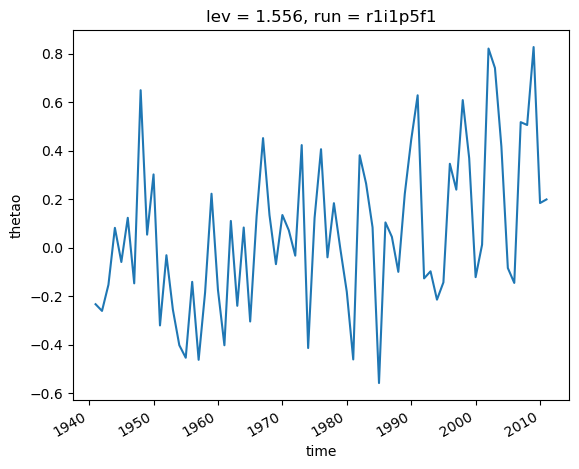

In [37]:
small_begin_path_avg_0mr1.plot()

In [38]:
time_range = slice("1940","2010")
small_run_1 = run_1_clean.sel(time=time_range)
small_run_1

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 71)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r1i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1940-12-31 1941-12-31 ... 2010-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

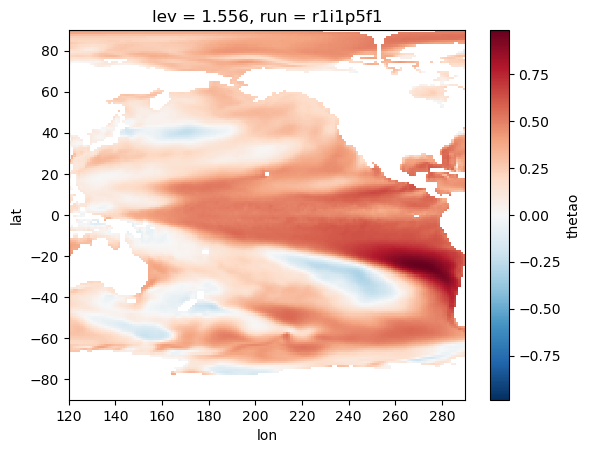

In [39]:
xr.corr(small_begin_path_avg_0mr1, small_run_1.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

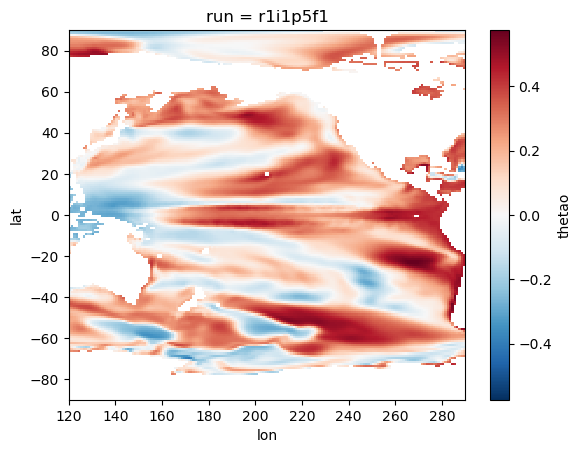

In [40]:
xr.corr(small_begin_path_avg_0mr1, small_run_1.thetao.sel(lev = 100, method = "nearest"), dim = "time").plot()

## RUN 8

In [41]:
#get the beginning of the path from 1940-2010

# Boundaries
lat_range = slice(-28, -23)
lon_range = slice(263, 282)  
time_range = slice("1940","2010")
depth_level = 0

# Get depth closest to 0 m 
depth_idx = abs(run_8.lev - depth_level).argmin().item()

# Select region and depth
small_begin_path_0m = run_8.thetao.sel(lat=lat_range, lon=lon_range, time=time_range).isel(lev=depth_idx)

# Average over latitude and longitude
small_begin_path_avg_0mr8 = small_begin_path_0m.mean(dim=["lat", "lon"])

small_begin_path_avg_0mr8

<xarray.DataArray 'thetao' (time: 71)>
array([-0.23454314,  0.03253457, -0.02353919, -0.22655885,  0.42654788,
        0.31002355, -0.0085653 ,  0.0688571 ,  0.0271493 , -0.08724958,
        0.5782897 ,  0.68261826,  0.21348156,  0.1230008 , -0.2213484 ,
        0.34058765,  0.1026895 ,  0.10100789,  0.177577  ,  0.7490644 ,
       -0.06644683,  0.14198413, -0.00765632,  0.06454116,  0.16666596,
       -0.5169558 , -0.0371789 ,  0.10003027,  0.29572004,  0.12517577,
        0.22294609, -0.06092449, -0.5787705 ,  0.11087976,  0.3022165 ,
        0.18553929,  0.34625703,  0.00734215,  0.509198  ,  0.10743155,
       -0.08979615, -0.00776723,  0.32399666,  0.0824713 , -0.56106514,
       -0.6526315 ,  0.03792068,  0.613111  ,  0.5501439 , -0.39352563,
        0.09468249,  0.18941931, -0.57674706,  0.52642435, -0.02451411,
        0.32802472,  0.4593236 ,  0.88650656,  0.41136563,  0.22425658,
        0.3323778 ,  0.10224529,  0.21192147,  0.9023859 ,  0.9431693 ,
        0.27169016,  0.74256134,  0.8366818 ,  0.28406692,  0.82345855,
        0.83910507], dtype=float32)
Coordinates:
    lev      float64 1.556
    run      <U8 'r8i1p5f1'
  * time     (time) datetime64[ns] 1940-12-31 1941-12-31 ... 2010-12-31

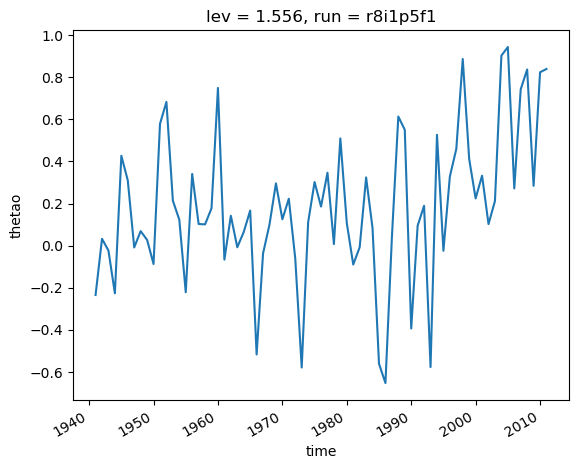

In [42]:
small_begin_path_avg_0mr8.plot()

In [43]:
time_range = slice("1940","2010")
small_run_8 = run_8_clean.sel(time=time_range)
small_run_8

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lon: 170, time: 71)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r8i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1940-12-31 1941-12-31 ... 2010-12-31
Data variables:
    thetao   (time, lev, lat, lon) float32 ...

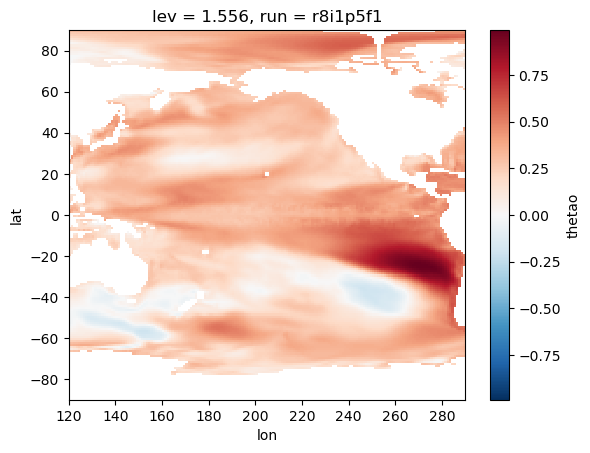

In [44]:
xr.corr(small_begin_path_avg_0mr8, small_run_8.thetao.sel(lev = 0, method = "nearest"), dim = "time").plot()

# --------------------------------------------------------------------------

# Time Lag Correlation (Sections)

## RUN 1

## **Surface**

In [45]:
section_0m_run1 = run_1_clean.thetao.sel(lev = 0, method = "nearest")
section_0m_run1

<xarray.DataArray 'thetao' (time: 165, lat: 180, lon: 170)>
[5049000 values with dtype=float32]
Coordinates:
    lev      float64 1.556
    run      <U8 'r1i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

## Smaller Time (1940-2010)

NameError: name 'lag_corr_0m_1' is not defined

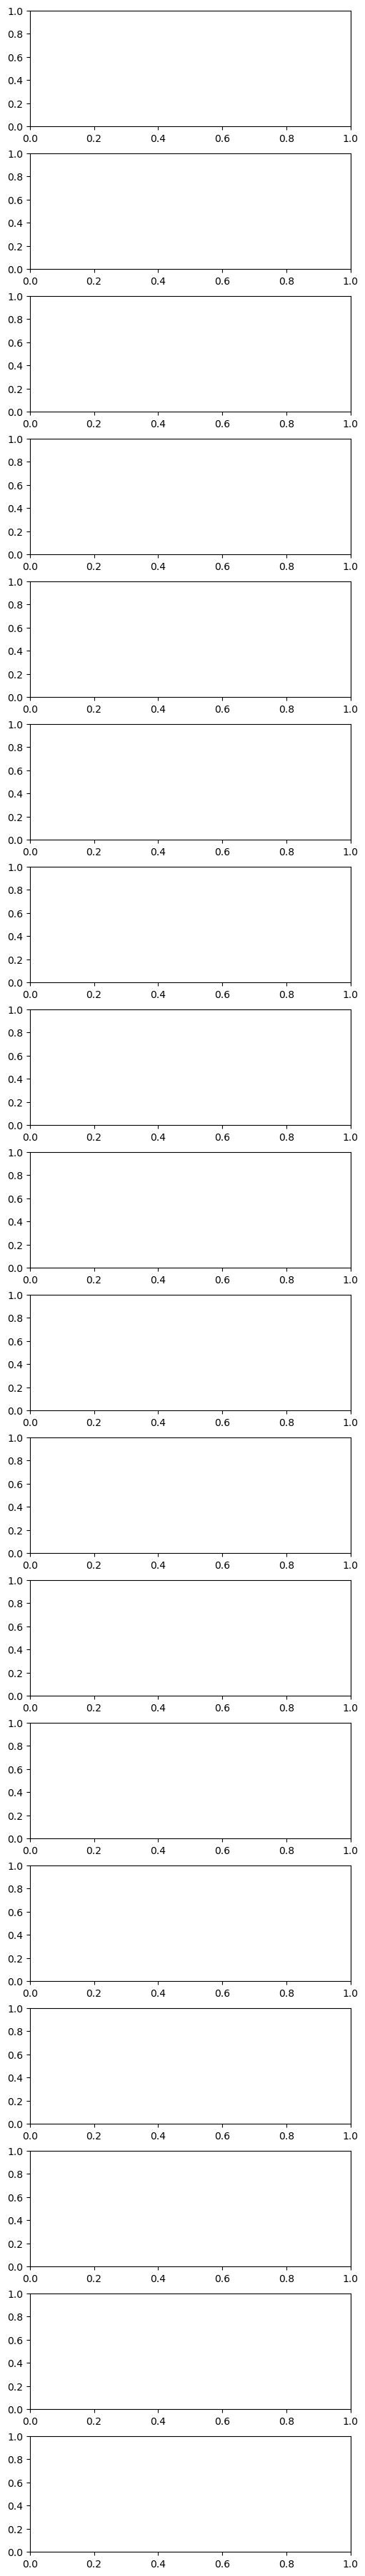

In [46]:
# Define the lags
lags = range(-3, 15) 

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)


if len(lags) == 1:
    axes = [axes]

small_correlation_sec_0m_1 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    small_lag_corr_0m_1 = xr.corr(
        small_begin_path_avg_0mr1.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    small_correlation_sec_0m_1.append(lag_corr_0m_1.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = small_begin_path_avg_0mr1.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = small_lag_corr_0m_1 * np.sqrt(n_time - 2) / np.sqrt(1 - small_lag_corr_0m_1**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    small_lag_corr_0m_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" 1940-2010 EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

# Full Time

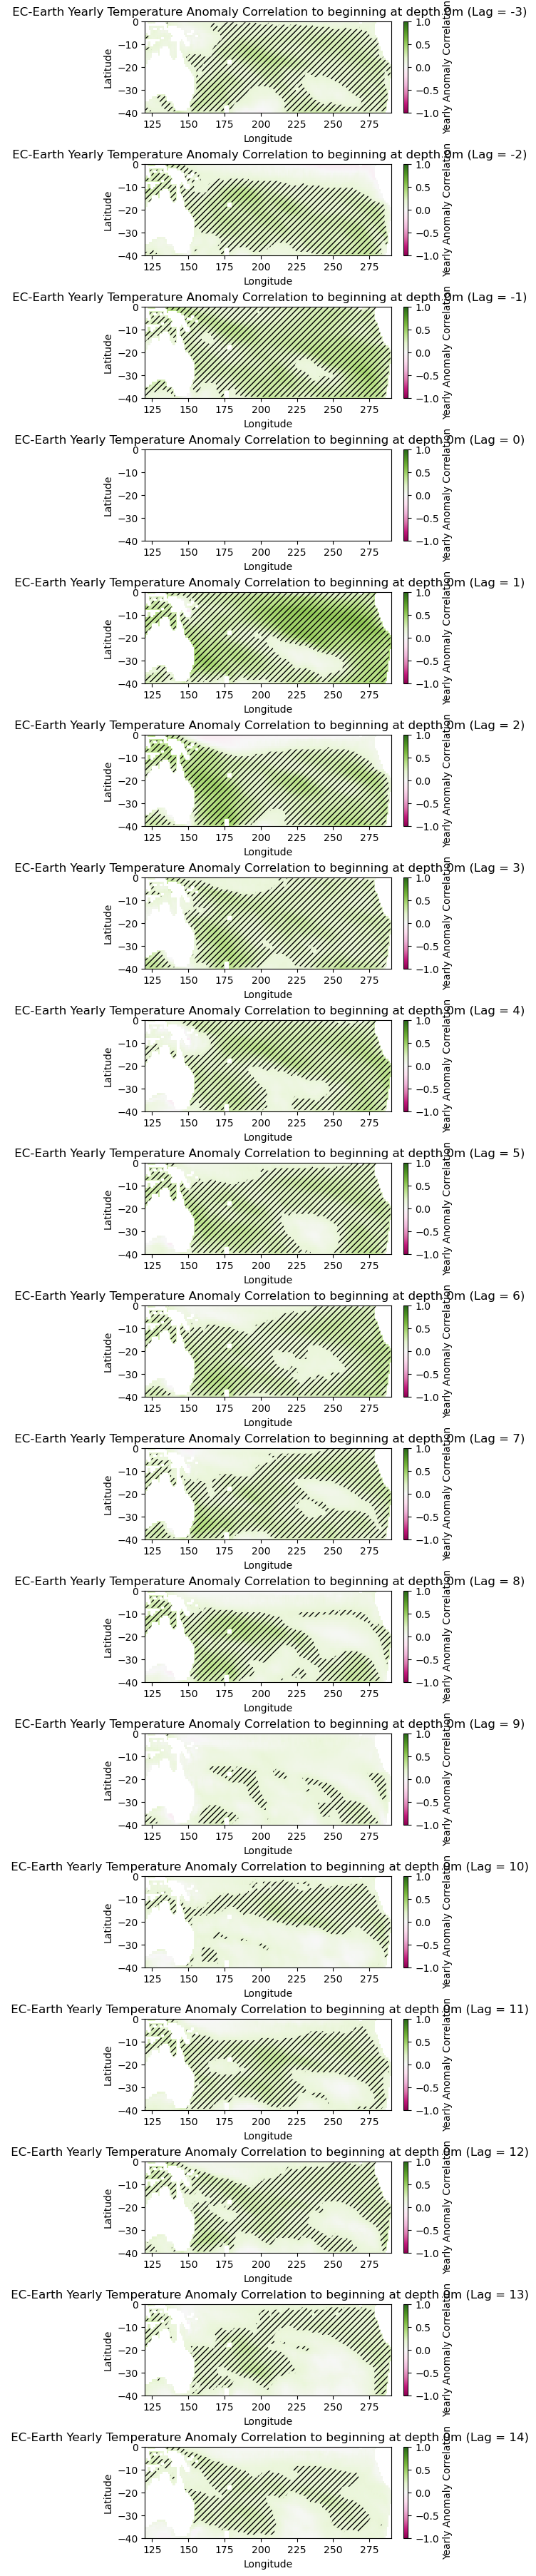

In [48]:
# Lags
lags = range(-3, 15)  

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_1 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    lag_corr_0m_1 = xr.corr(
        begin_path_avg_0mr1.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_1.append(lag_corr_0m_1.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0mr1.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr_0m_1 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_1**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr_0m_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)
    
    ax.set_title(f" EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Includes lag = 0

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_1 = []

for i, lag in enumerate(lags):
    # Shift section depending on lag
    if lag > 0:
        shifted_section = section_0m_run1.shift(time=-lag).isel(time=slice(None, -lag)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr1.isel(time=slice(lag, None))
    elif lag < 0:
        shifted_section = section_0m_run1.shift(time=-lag).isel(time=slice(-lag, None)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr1.isel(time=slice(None, lag))
    else:  # lag == 0
        shifted_section = section_0m_run1.sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr1

    # Calculate correlation
    lag_corr_0m_1 = xr.corr(
        ref_series,
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_1.append(lag_corr_0m_1.assign_coords(lag=lag))

    # Number of time steps
    n_time = ref_series.time.size

    # Calculate t-statistic
    t_stat = lag_corr_0m_1 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_1**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot
    ax = axes[i]
    lag_corr_0m_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Titles and labels
    ax.set_title(f"EC-Earth Yearly Temp Anomaly Corr to Beginning at 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Colorbar styling
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
xr.concat(correlation_sec_0m_1, dim="lag")

## RUN 3

In [ ]:
section_0m_run3 = run_3_clean.thetao.sel(lev = 0, method = "nearest")
section_0m_run3

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_3 = []

for i, lag in enumerate(lags):
    # Shift section and reference time series based on lag
    if lag > 0:
        shifted_section = section_0m_run3.shift(time=-lag).isel(time=slice(None, -lag)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr3.isel(time=slice(lag, None))
    elif lag < 0:
        shifted_section = section_0m_run3.shift(time=-lag).isel(time=slice(-lag, None)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr3.isel(time=slice(None, lag))
    else:  # lag == 0
        shifted_section = section_0m_run3.sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr3

    # Calculate correlation
    lag_corr_0m_3 = xr.corr(
        ref_series,
        shifted_section,
        dim="time"
    )

    # ✅ Fixed this line: was mistakenly appending lag_corr_0m_8
    correlation_sec_0m_3.append(lag_corr_0m_3.assign_coords(lag=lag))

    # Number of time steps used
    n_time = ref_series.time.size

    # Calculate t-statistic
    t_stat = lag_corr_0m_3 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_3**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Compute two-tailed p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plotting
    ax = axes[i]
    lag_corr_0m_3.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance hatch
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize plot
    ax.set_title(f"Run 3 EC-Earth Yearly Temp Anomaly Corr to Beginning at 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Style colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


## RUN 4

# Full Time

## **Surface**

In [ ]:
section_0m_run4 = run_4_clean.thetao.sel(lev = 0, method = "nearest")
section_0m_run4

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Includes lag = 0

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_4 = []

for i, lag in enumerate(lags):
    # Shift section and reference time series based on lag
    if lag > 0:
        shifted_section = section_0m_run4.shift(time=-lag).isel(time=slice(None, -lag)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr4.isel(time=slice(lag, None))
    elif lag < 0:
        shifted_section = section_0m_run4.shift(time=-lag).isel(time=slice(-lag, None)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr4.isel(time=slice(None, lag))
    else:  # lag == 0
        shifted_section = section_0m_run4.sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr4

    # Calculate correlation
    lag_corr_0m_4 = xr.corr(
        ref_series,
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_4.append(lag_corr_0m_4.assign_coords(lag=lag))

    # Number of time steps used
    n_time = ref_series.time.size

    # Calculate t-statistic
    t_stat = lag_corr_0m_4 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_4**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plotting
    ax = axes[i]
    lag_corr_0m_4.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance hatch
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize plot
    ax.set_title(f"Run 4 EC-Earth Yearly Temp Anomaly Corr to Beginning at 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Colorbar tweaks
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Example: from -10 to +10

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_4 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run4.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    lag_corr_0m_4 = xr.corr(
        begin_path_avg_0mr4.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_4.append(lag_corr_0m_4.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0mr4.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr_0m_4 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_4**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr_0m_4.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" Run 4 EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

In [ ]:
section_150m_run4 = run_12_clean.thetao.sel(lev = 150, method = "nearest")
section_150m_run4

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats

# Define the lags to analyze
lags = range(9, 19)

# Latitude slice
lat_slice = slice(-40, 10)

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 5 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_150m_4 = []

for i, lag in enumerate(lags):
    if lag < 0:
        shifted_section = section_150m_run4.shift(time=-lag).isel(time=slice(None, lag))
        base = begin_path_avg_0mr4.isel(time=slice(-lag, None))
    elif lag > 0:
        shifted_section = section_150m_run4.shift(time=-lag).isel(time=slice(None, -lag))
        base = begin_path_avg_0mr4.isel(time=slice(lag, None))
    else:  # lag == 0
        shifted_section = section_150m_run4
        base = begin_path_avg_0mr4

    shifted_section = shifted_section.sel(lat=lat_slice)

    lag_corr_150m_4 = xr.corr(base, shifted_section, dim="time")
    correlation_sec_150m_4.append(lag_corr_150m_4.assign_coords(lag=lag))

    n_time = base.time.size
    t_stat = lag_corr_150m_4 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_150m_4**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")
    df = n_time - 2
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2
    alpha = 0.05
    significance_mask = p_values < alpha

    ax = axes[i]

    # Main correlation plot WITHOUT colorbar
    lag_corr_150m_4.plot(
        ax=ax,
        vmin=-1.0, vmax=1.0, cmap="PiYG",
        add_colorbar=False
    )

    # Significance hatch
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Land mask overlay
    land_mask = np.isnan(lag_corr_150m_4.sel(lat=lat_slice))
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Title and axis formatting
    ax.set_title(f"Run 12 (Lag = {lag})", fontsize=20)
    ax.set_xlabel("Longitude", fontsize=24)
    ax.set_ylabel("Latitude", fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=20, width=1.5, length=6)

fig.savefig('Section_r4.png', dpi=300, bbox_inches='tight')
plt.show()




In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

# Define the lags to analyze (including lag = 0)
lags = range(-3, 15)  # Example: from -3 to +14

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_4 = []

for i, lag in enumerate(lags):
    # Shift section in time
    if lag == 0:
        shifted_section = section_150m_run4.sel(lat=slice(-40, 0))  # No shift needed
        begin_path_adjusted = begin_path_avg_0mr4
    else:
        shifted_section = section_0m_run4.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))
        begin_path_adjusted = begin_path_avg_0mr4.isel(time=slice(abs(lag), None))

    # Calculate correlation for the current lag
    lag_corr_0m_4 = xr.corr(begin_path_adjusted, shifted_section, dim="time")

    correlation_sec_0m_4.append(lag_corr_0m_4.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = begin_path_adjusted.time.size

    # Calculate the t-statistic
    t_stat = lag_corr_0m_4 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_4**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr_0m_4.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.set_title(f"Run 4 EC-Earth Yearly Temperature Anomaly Correlation at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


## RUN 8

## Smaller Time (1940-2010)

## **Surface**

In [ ]:
section_0m_run8 = run_8_clean.thetao.sel(lev = 0, method = "nearest")
section_0m_run8

## Small Time

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Example: from -10 to +10

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

small_correlation_sec_0m_8 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run8.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    small_lag_corr_0m_8 = xr.corr(
        small_begin_path_avg_0mr8.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    small_correlation_sec_0m_8.append(lag_corr_0m_8.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = small_begin_path_avg_0mr8.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = small_lag_corr_0m_8 * np.sqrt(n_time - 2) / np.sqrt(1 - small_lag_corr_0m_8**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    small_lag_corr_0m_8.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" 1940-2010 EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m run 8 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

## FULL TIME

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Includes lag = 0

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_8 = []

for i, lag in enumerate(lags):
    # Shift section and reference series depending on lag
    if lag > 0:
        shifted_section = section_0m_run8.shift(time=-lag).isel(time=slice(None, -lag)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr8.isel(time=slice(lag, None))
    elif lag < 0:
        shifted_section = section_0m_run8.shift(time=-lag).isel(time=slice(-lag, None)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr8.isel(time=slice(None, lag))
    else:  # lag == 0
        shifted_section = section_0m_run8.sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr8

    # Calculate correlation
    lag_corr_0m_8 = xr.corr(
        ref_series,
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_8.append(lag_corr_0m_8.assign_coords(lag=lag))

    # Number of time steps
    n_time = ref_series.time.size

    # Calculate t-statistic
    t_stat = lag_corr_0m_8 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_8**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot
    ax = axes[i]
    lag_corr_0m_8.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance hatching
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize plot
    ax.set_title(f"Run 8 EC-Earth Yearly Temp Anomaly Corr to Beginning at 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Colorbar styling
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Example: from -10 to +10

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_8 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run8.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    lag_corr_0m_8 = xr.corr(
        begin_path_avg_0mr8.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_8.append(lag_corr_0m_8.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0mr8.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr_0m_8 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_8**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr_0m_8.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" Run 8 EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

## RUN 12

## **Surface**

In [ ]:
section_0m_run12 = run_12_clean.thetao.sel(lev = 0, method = "nearest")
section_0m_run12

## FULL TIME

In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Includes lag = 0

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_12 = []

for i, lag in enumerate(lags):
    # Shift section and reference time series based on lag
    if lag > 0:
        shifted_section = section_0m_run12.shift(time=-lag).isel(time=slice(None, -lag)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr12.isel(time=slice(lag, None))
    elif lag < 0:
        shifted_section = section_0m_run12.shift(time=-lag).isel(time=slice(-lag, None)).sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr12.isel(time=slice(None, lag))
    else:  # lag == 0
        shifted_section = section_0m_run12.sel(lat=slice(-40, 40))
        ref_series = begin_path_avg_0mr12

    # Calculate correlation
    lag_corr_0m_12 = xr.corr(
        ref_series,
        shifted_section,
        dim="time"
    )

    # ✅ Fixed this line: was mistakenly appending lag_corr_0m_8
    correlation_sec_0m_12.append(lag_corr_0m_12.assign_coords(lag=lag))

    # Number of time steps used
    n_time = ref_series.time.size

    # Calculate t-statistic
    t_stat = lag_corr_0m_12 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_12**2)
    t_stat = t_stat.drop_vars("lev", errors="ignore")

    # Degrees of freedom
    df = n_time - 2

    # Compute two-tailed p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plotting
    ax = axes[i]
    lag_corr_0m_12.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'},
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance hatch
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize plot
    ax.set_title(f"Run 12 EC-Earth Yearly Temp Anomaly Corr to Beginning at 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Style colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
# Define the lags to analyze
lags = range(-3, 15)  # Example: from -10 to +10

# Create a figure:
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

correlation_sec_0m_12 = []
for i, lag in enumerate(lags):
    #Shift Section in time
    shifted_section = section_0m_run12.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40,0))
    
    # Calculate correlation for the current lag
    lag_corr_0m_12 = xr.corr(
        begin_path_avg_0mr12.isel(time=slice(abs(lag), None)),
        shifted_section,
        dim="time"
    )

    correlation_sec_0m_12.append(lag_corr_0m_8.assign_coords(lag=lag))

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0mr12.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr_0m_12 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_0m_12**2)

    # **For some reason it kept the lev coordinate in t_stat which causes errors, so:
    t_stat = t_stat.drop_vars("lev", errors="ignore")



    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr_0m_12.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    #Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax)

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" Run 12 EC-Earth Yearly Temperature Anomaly Correlation to beginning at depth 0m (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

# -----------------------------------------------------------------------------------

In [ ]:
# Andreas loop....

# Do the time lagged correlation:


# Define the time lags
lags = range(-2, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]

correlation_1_sec = []
for i, lag in enumerate(lags):
    # Shift section in time
    shifted_section = section_0m_run1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_1_sec = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_section, 
        dim="time"
    )

    correlation_1_sec.append(lag_corr_1_sec.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_1_sec * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_1_sec.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot

    ax.set_title(f"Lag = {lag} years", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_1_sec

# Time Lag Correlation (Cross-Sections)

### **Run 12**

### Cross section at 240*

In [ ]:
cross_section_240_12 = run_12_clean.thetao.sel(lon=240, method="nearest")
cross_section_240_12

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]

correlation_12 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_240_12.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_12 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )

    correlation_12.append(lag_corr_12.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_12 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_12**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_12.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r12) Yearly Anomaly Correlation beginning vs 240 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_12


In [ ]:
lag_corr

### **Lag 8**

In [ ]:
cross_section_240_8 = run_8_clean.thetao.sel(lon=240, method="nearest")
cross_section_240_8

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]
    
correlation_8 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_240_8.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    
    # Compute correlation
    lag_corr_8 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )
    correlation_8.append(lag_corr_8.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_8 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_8**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_8.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r8) Yearly Anomaly Correlation beginning vs 240 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_8

### **Run 4**

In [ ]:
cross_section_240_4 = run_4_clean.thetao.sel(lon=240, method="nearest")
cross_section_240_4

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]

correlation_4 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_240_4.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_4 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )

    correlation_4.append(lag_corr_4.assign_coords(lag=lag))
    
    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_4 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_4**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_4.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r4) Yearly Anomaly Correlation beginning vs 240 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_4

### **Run 1**

#### 240

In [ ]:
cross_section_240_1 = run_1_clean.thetao.sel(lon=240, method="nearest")
cross_section_240_1

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]
    
correlation_1 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_240_1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_1 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )
    correlation_1.append(lag_corr_1.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_1 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_1**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r1) Yearly Anomaly Correlation beginning vs 240 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_1

### 230

In [ ]:
cross_section_230_1 = run_1_clean.thetao.sel(lon=230, method="nearest")
cross_section_230_1

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]
    
correlation_1 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_230_1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_1 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )
    correlation_1.append(lag_corr_1.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_1 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_1**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r1) Yearly Anomaly Correlation beginning vs 230 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_1

### 210

In [ ]:
cross_section_210_1 = run_1_clean.thetao.sel(lon=230, method="nearest")
cross_section_210_1

In [ ]:
# Do the time lagged correlation:


# Define the time lags
lags = range(-3, 15) 

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Loop
if len(lags) == 1:
    axes = [axes]
    
correlation_1 = []
for i, lag in enumerate(lags):
    # Shift cross-section in time
    shifted_cross_section = cross_section_210_1.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0))

    # Compute correlation
    lag_corr_1 = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)), 
        shifted_cross_section, 
        dim="time"
    )
    correlation_1.append(lag_corr_1.assign_coords(lag=lag))

    # Number of time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Compute t-statistic
    t_stat = lag_corr_1 * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr_1**2)
    df = n_time - 2  # Degrees of freedom

    # Compute p-values
    p_values = xr.apply_ufunc(stats.t.sf, np.abs(t_stat), df, kwargs={"loc": 0, "scale": 1}) * 2  # Two-tailed

    # Significance mask (p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation with significance overlay
    ax = axes[i]
    lag_corr_1.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downward
    ax.set_title(f"EC-Earth (r1) Yearly Anomaly Correlation beginning vs 210 (Lag = {lag})", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()
lag_corr_1